In [43]:
import pandas as pd
df=pd.read_csv("../collapsed_datasets/dataset_peaks_2.csv").drop("Unnamed: 0", axis=1)
X=df.drop("class", axis=1)
y=df["class"]

In [44]:
# in questo notebook andremo a cercare il miglior classificatore

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, accuracy_score


knn_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

res=cross_validate(knn_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

knn_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

In [45]:
from sklearn.svm import SVC
SVC_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", SVC())
])

res=cross_validate(SVC_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

SVC_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(SVC_results)

{'precision': 0.8199816014279977, 'recall': 0.8004424537172785, 'f1': 0.7988226979464546}


In [46]:
from sklearn.tree import DecisionTreeClassifier
tree_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", DecisionTreeClassifier())
])

res=cross_validate(tree_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

tree_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(tree_results)

{'precision': 0.8643370231547859, 'recall': 0.8622043820713226, 'f1': 0.8629648011320696}


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
ranfor_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", RandomForestClassifier())
])

res=cross_validate(ranfor_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted"),
    'accuracy':make_scorer(accuracy_score)
}, cv=KFold(5, shuffle=True, random_state=12))

ranfor_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(ranfor_results)


{'precision': 0.9049636372571159, 'recall': 0.9036435699624885, 'f1': 0.9038657772282763}
0.9052514079451586


In [48]:
from sklearn.linear_model import LogisticRegression
logregr_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", LogisticRegression(max_iter=1000))
])

res=cross_validate(logregr_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

logregr_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(logregr_results)

{'precision': 0.8304387695602482, 'recall': 0.8157303620719292, 'f1': 0.8161464728640526}


In [49]:
from sklearn.naive_bayes import GaussianNB
nb_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", GaussianNB())
])

res=cross_validate(nb_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

nb_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(nb_results)

{'precision': 0.7265236363276013, 'recall': 0.6680731625936523, 'f1': 0.6658229191276066}


dict_keys(['precision', 'recall', 'f1'])


<BarContainer object of 3 artists>

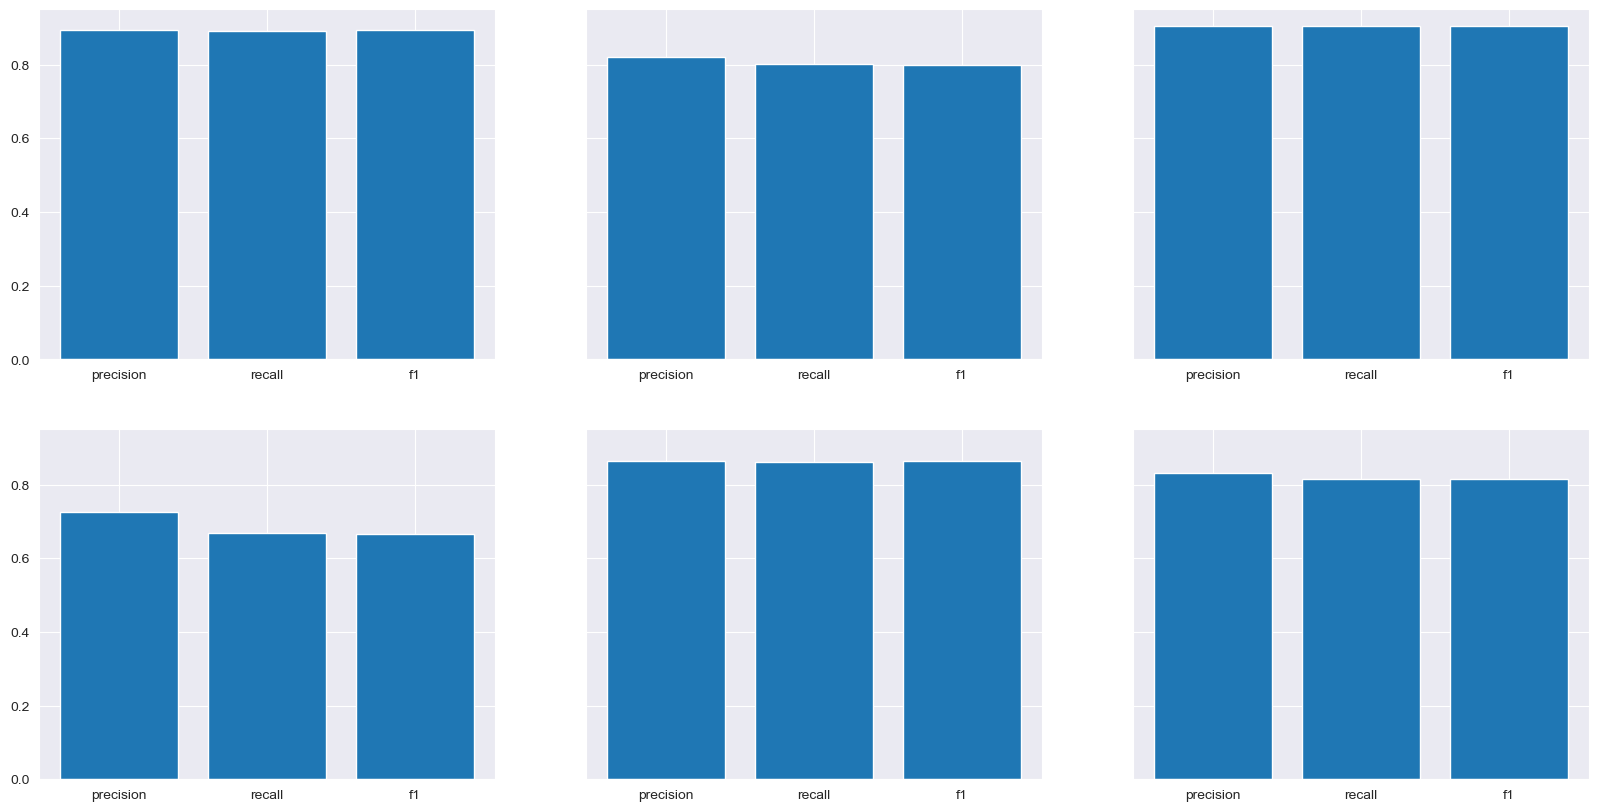

In [50]:
from matplotlib import pyplot as plt
f,axes=plt.subplots(2,3,figsize=(20,10), sharey=True)
print(knn_results.keys())
axes[0][0].bar(knn_results.keys(), knn_results.values())
axes[0][1].bar(SVC_results.keys(), SVC_results.values())
axes[0][2].bar(ranfor_results.keys(), ranfor_results.values())
axes[1][0].bar(nb_results.keys(), nb_results.values())
axes[1][1].bar(tree_results.keys(), tree_results.values())
axes[1][2].bar(logregr_results.keys(), logregr_results.values())

In [ ]:
# SIAMO 2 MONGOLI CI SIAMO SCORDATI DI RIMUOVERE LE FEATURES DEL CAZZO, ECCO PERCHè HA STA ACCURACY DI MERDA!!!!!